In [1]:
#common lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#preprocessing lib
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

#outliars
from scipy import stats

#multicoliniarity lib
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest,f_classif

#model lib
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR

#evaluation lib
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#hyper parameter tuning lib
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

#ignore warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the test and train dataset
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
#combining train and test dataset
train['Source']='train'
test['Source']='test'

#Combing train and test dataset for the EDA and preprocessning 
df=pd.concat([train,test],ignore_index=True)

In [4]:
#printing shape of train,test and df dataset
print(train.shape, test.shape, df.shape)

(1168, 82) (292, 81) (1460, 82)


In [5]:
#printing the dataframe
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Source
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2007,WD,Normal,128000.0,train
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,10,2007,WD,Normal,268000.0,train
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2007,WD,Normal,269790.0,train
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000.0,train
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2009,WD,Normal,215000.0,train


In [6]:
#setting the option for the max rows
pd.set_option('display.max_rows',None)

In [7]:
#checking the info of the df
df.info()
#the columns consist of object, int64 and float datatypes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
#checking the null values from dataframe
df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [15]:
#there are multiple columns which having the null values.
#50% of 1460 is 730.0

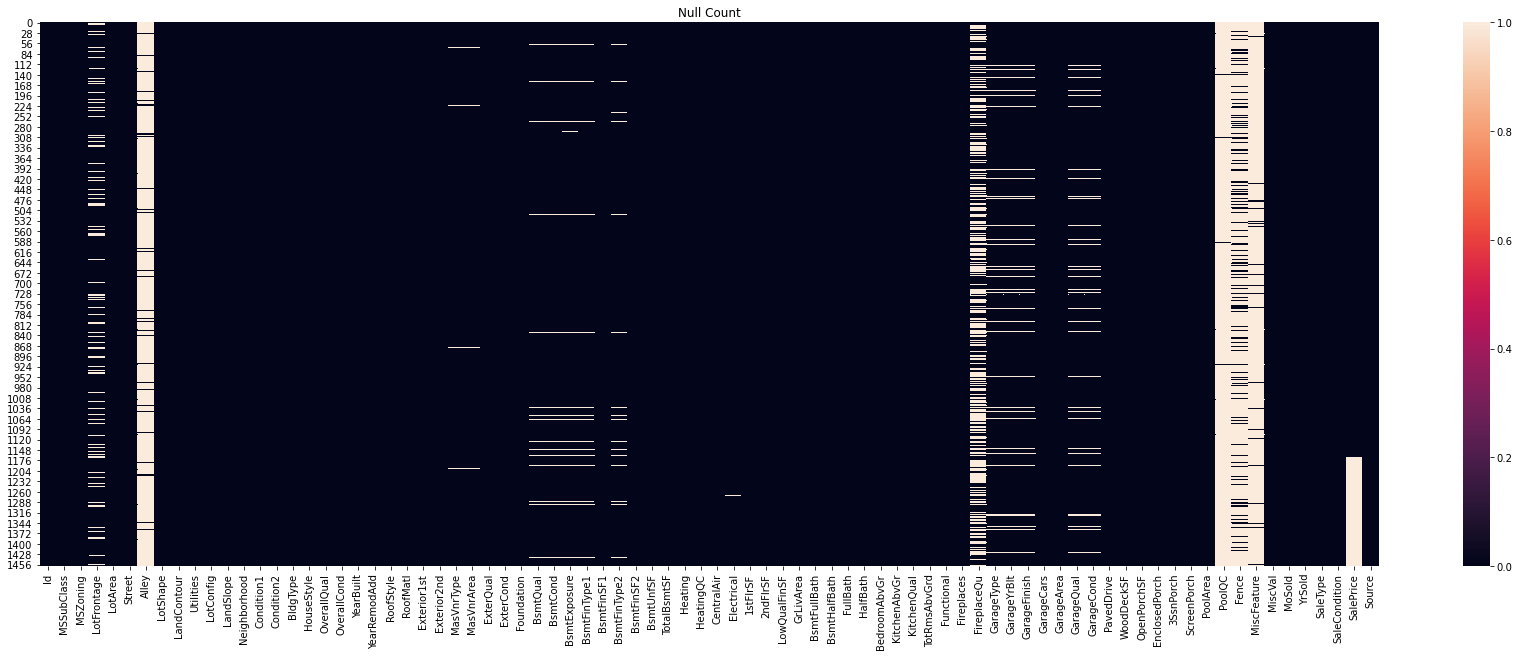

In [22]:
#plotting the heatmap to check the null values.
plt.figure(figsize=(30,10))
sns.heatmap(df.isnull())
plt.title('Null Count')
plt.show()

In [ ]:
#From heat map also we can see that there is null values in many of the columns.

In [8]:
#deleting the features having more the 50% of the null values beause replacing those colomns null value does not impact model performance.
#features PoolQC,Fence,MiscFeature,Alley having more than 50% of null values so deleting this features from the data frame.

df=df.drop(columns=['PoolQC','Fence','MiscFeature','Alley'],axis=1)

In [10]:
#checking the null values from dataframe
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [25]:
#checking the numeric data types
df._get_numeric_data().columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [29]:
#checking the object data types
df.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'Source'],
      dtype='object')

In [9]:
#replacing the numeric null value with the mean
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())
df['SalePrice']=df['SalePrice'].fillna(df['SalePrice'].mean())
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

#replacing the object null with the mode
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0])
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])

In [11]:
#checking the null values again after replacing the null values
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [38]:
#discribing the data frame
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,181477.005993
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.994583,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,70748.125717
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,137800.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.506164,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,181477.005993
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,196250.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
#From the describe we can see that the standerd daviation is not normal.
#the mean and median(50%) looks approx equal so there is less outliers in the data frame.

In [44]:
#cheking the unwanted features which is not use to outcome
#Id
df['Id'].value_counts()

1460    1
479     1
481     1
482     1
483     1
484     1
485     1
486     1
487     1
488     1
489     1
490     1
491     1
492     1
493     1
494     1
495     1
496     1
497     1
498     1
499     1
480     1
478     1
501     1
477     1
458     1
459     1
460     1
461     1
462     1
463     1
464     1
465     1
466     1
467     1
468     1
469     1
470     1
471     1
472     1
473     1
474     1
475     1
476     1
500     1
502     1
547     1
525     1
527     1
528     1
529     1
530     1
531     1
532     1
533     1
534     1
535     1
536     1
537     1
538     1
539     1
540     1
541     1
542     1
543     1
544     1
545     1
526     1
524     1
503     1
523     1
504     1
505     1
506     1
507     1
508     1
509     1
510     1
511     1
512     1
513     1
514     1
515     1
516     1
517     1
518     1
519     1
520     1
521     1
522     1
457     1
456     1
455     1
388     1
390     1
391     1
392     1
393     1
394     1
395     1


In [12]:
#dropping the columd Id as it has no impact on the outcome
df=df.drop(columns='Id',axis=1)

In [19]:
#identifying the variable with 0 value:
values={}
for i in list(df.columns):
    if (df[i]).dtype == 'int64' or (df[i]).dtype == 'float64':
        j=np.sum(df[i] == 0)
        values[i]=j
values=pd.DataFrame.from_dict(values,orient='index')
print(values)

                  0
MSSubClass        0
LotFrontage       0
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea      861
BsmtFinSF1      467
BsmtFinSF2     1293
BsmtUnfSF       118
TotalBsmtSF      37
1stFlrSF          0
2ndFlrSF        829
LowQualFinSF   1434
GrLivArea         0
BsmtFullBath    856
BsmtHalfBath   1378
FullBath          9
HalfBath        913
BedroomAbvGr      6
KitchenAbvGr      1
TotRmsAbvGrd      0
Fireplaces      690
GarageYrBlt       0
GarageCars       81
GarageArea       81
WoodDeckSF      761
OpenPorchSF     656
EnclosedPorch  1252
3SsnPorch      1436
ScreenPorch    1344
PoolArea       1453
MiscVal        1408
MoSold            0
YrSold            0
SalePrice         0


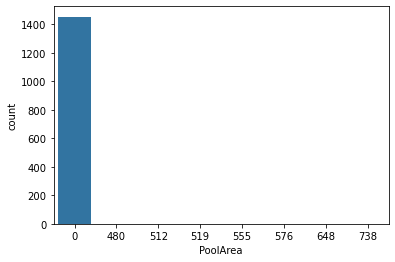

In [30]:
#Checking the 0 values using bar plot
sns.countplot(x='PoolArea',data=df)
plt.show()

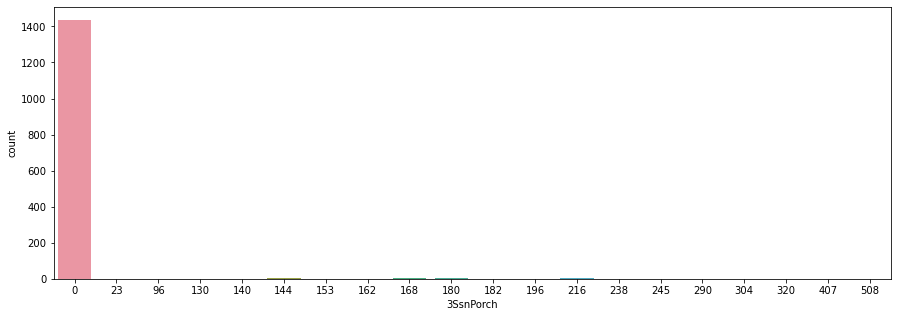

In [35]:
#Checking the 0 values using bar plot
plt.figure(figsize=(15,5))
sns.countplot(x='3SsnPorch',data=df)
plt.show()

In [ ]:
#As we can see there is more than 50% of zero values in the features.
#We can not replace 0 with mean as it is the major data in the features.

In [12]:
df.select_dtypes(include = ['object']).columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'Source'],
      dtype='object')

In [49]:
#MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle
#Street,Utilities,CentralAir
df['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

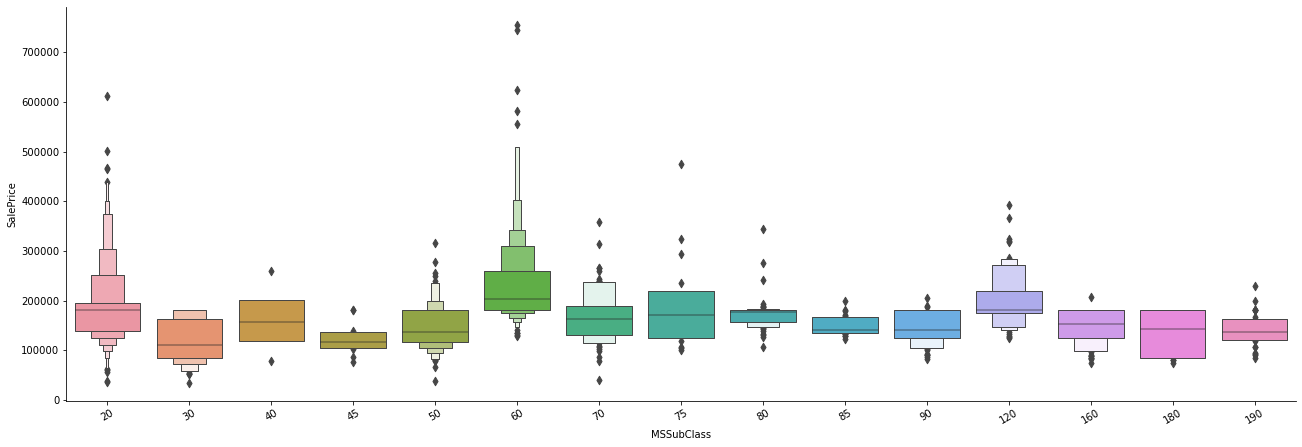

In [33]:
#plotting the graph MSSubClass vs SalePrice
sns.catplot(y = "SalePrice", x = "MSSubClass", data = df.sort_values("SalePrice", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.xticks(rotation=30)
plt.show()

In [ ]:
#from the boxen plot it is clear the tge MsubClass 60(2-STORY 1946 & NEWER) has the highest sale price as compare to othrs.

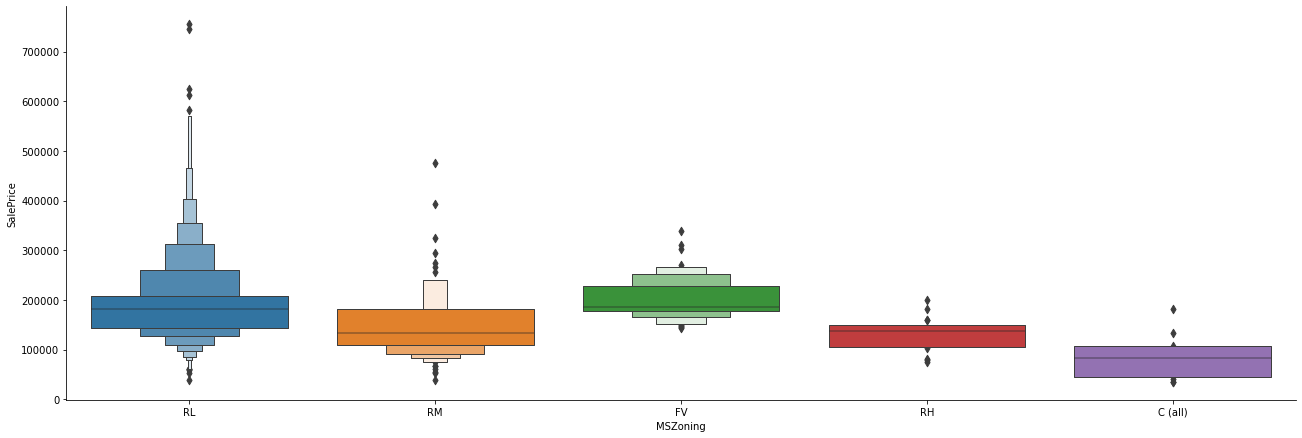

In [35]:
#Plotting the graph MSZoing vs saleprice
sns.catplot(y='SalePrice',x='MSZoning',data=df.sort_values('SalePrice',ascending=False),kind='boxen',height=6,aspect=3)
plt.show()

In [ ]:
#From the boxen plot it is clear that MSZoning RL(Residential Low Density) has the highest price as compare to other MSZoning.

In [36]:
df['Condition1'].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [37]:
#ExterQual,BsmtCond,BsmtFinType2
df['Condition2'].value_counts()

Norm      1445
Feedr        6
RRNn         2
PosN         2
Artery       2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

In [7]:
#using labelencoder to encode the categorical data into numerical
lb=LabelEncoder()
lb_val=['Street','Utilities','CentralAir']

for i in lb_val:
    df[i]=lb.fit_transform(df[i])

In [9]:
df['CentralAir'].value_counts()

1    1365
0      95
Name: CentralAir, dtype: int64

In [8]:
#encoding the catagorical value using get_dummies encoding
df=pd.get_dummies(data=df,columns=['MSZoning','LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'])

In [130]:
df.head()

,MSSubClass,LotFrontage,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,120,70.049958,4928,1,0,6,5,1976,1976,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,95.000000,15865,1,0,8,6,1970,1970,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,92.000000,9920,1,0,7,5,1996,1997,0.0,...,0,0,0,1,0,0,0,0,1,0
3,20,105.000000,11751,1,0,6,6,1977,1977,480.0,...,0,0,0,0,0,0,0,0,1,0
4,20,70.049958,16635,1,0,6,7,1977,2000,126.0,...,0,0,0,1,0,0,0,0,1,0


In [133]:
df.iloc[:,:39].head()

,MSSubClass,LotFrontage,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,120,70.049958,4928,1,0,6,5,1976,1976,0.0,...,440,0,205,0,0,0,0,0,2,2007
1,20,95.000000,15865,1,0,8,6,1970,1970,0.0,...,621,81,207,0,0,224,0,0,10,2007
2,60,92.000000,9920,1,0,7,5,1996,1997,0.0,...,455,180,130,0,0,0,0,0,6,2007
3,20,105.000000,11751,1,0,6,6,1977,1977,480.0,...,546,0,122,0,0,0,0,0,1,2010
4,20,70.049958,16635,1,0,6,7,1977,2000,126.0,...,529,240,0,0,0,0,0,0,6,2009


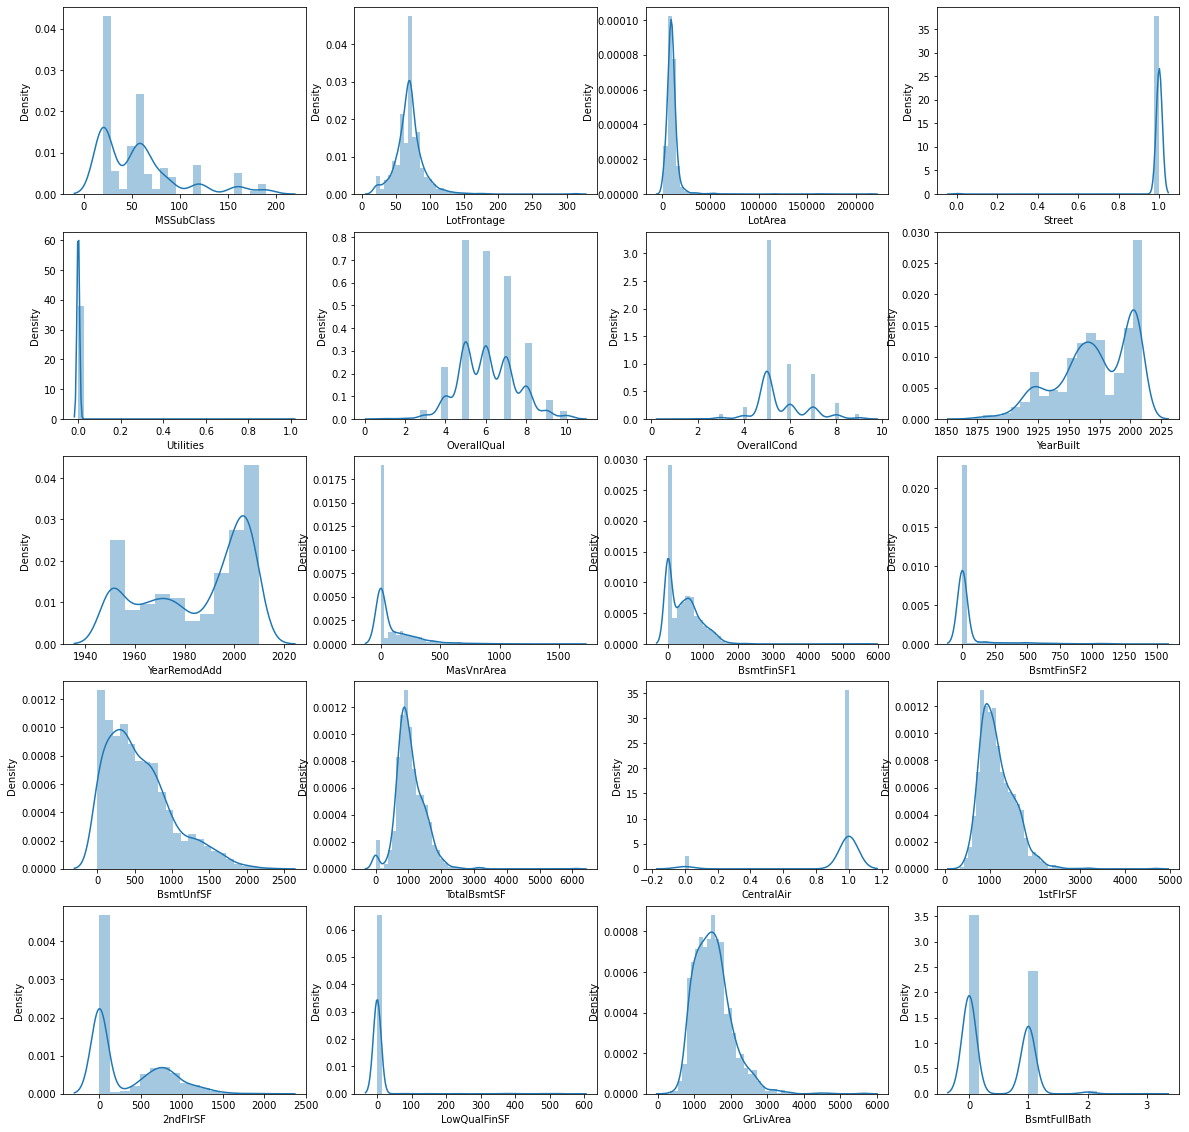

In [61]:
#ploting the distribition plot to check the data distribution
plt.figure(figsize=(20,20),facecolor='white')
pltnum=1

for column in df.iloc[:,:20]:
    if pltnum <= 20:
        plt.subplot(5,4,pltnum)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
        
    pltnum +=1
plt.show()    

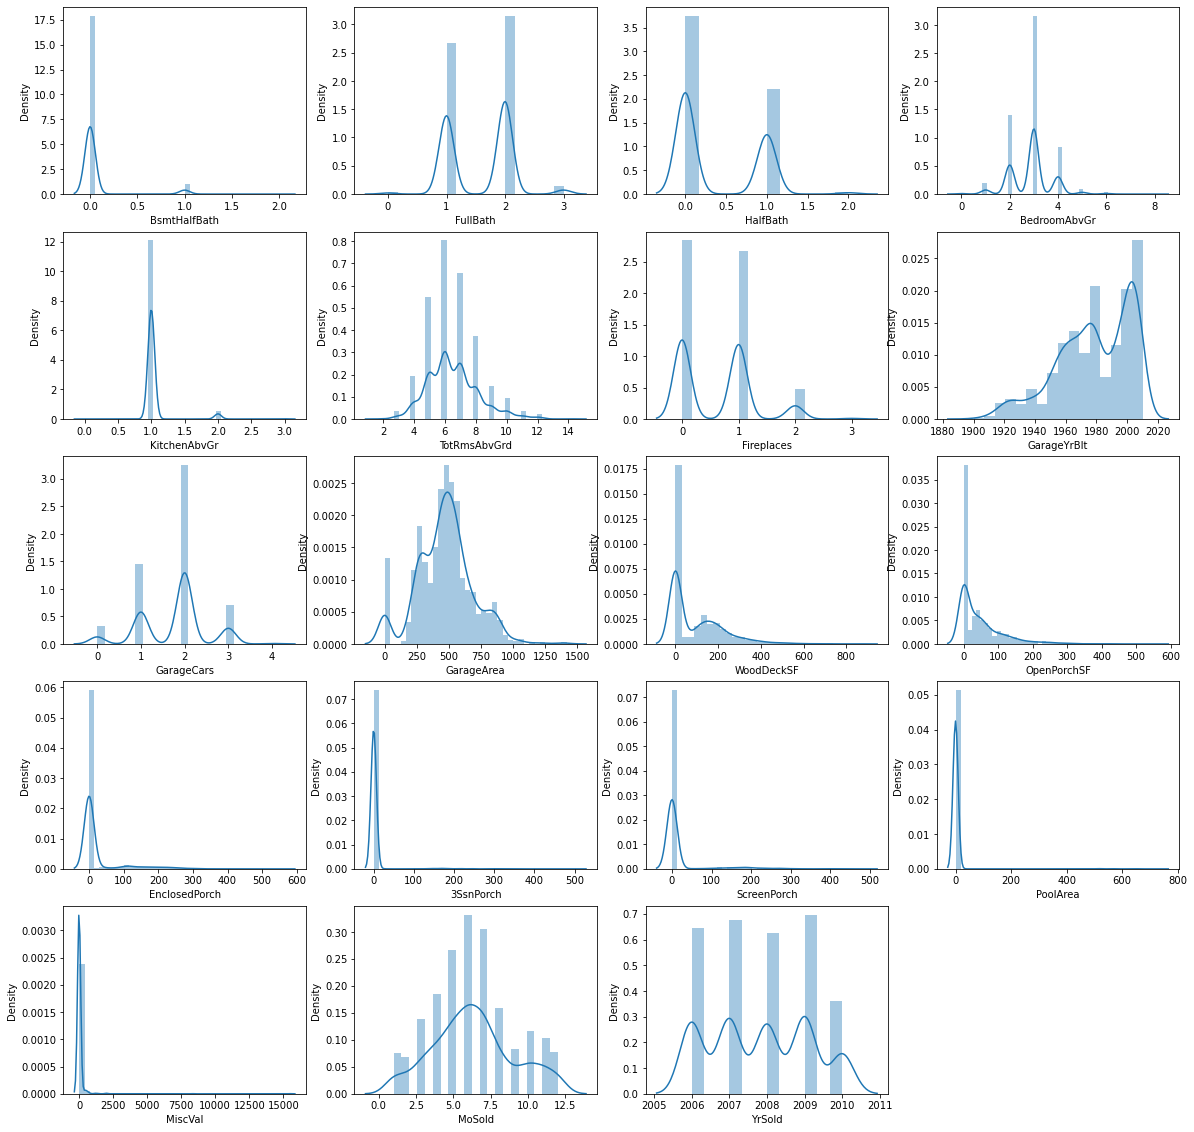

In [64]:
#ploting the distribition plot to check the data distribution
plt.figure(figsize=(20,20),facecolor='white')
pltnum=1

for column in df.iloc[:,20:39]:
    if pltnum <= 20:
        plt.subplot(5,4,pltnum)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
        
    pltnum +=1
plt.show()    

In [ ]:
#After plotting the distplot the data distribution not looks normal and outliers are clearly visible in the features.
#for max of the features outliers is present in data frame.

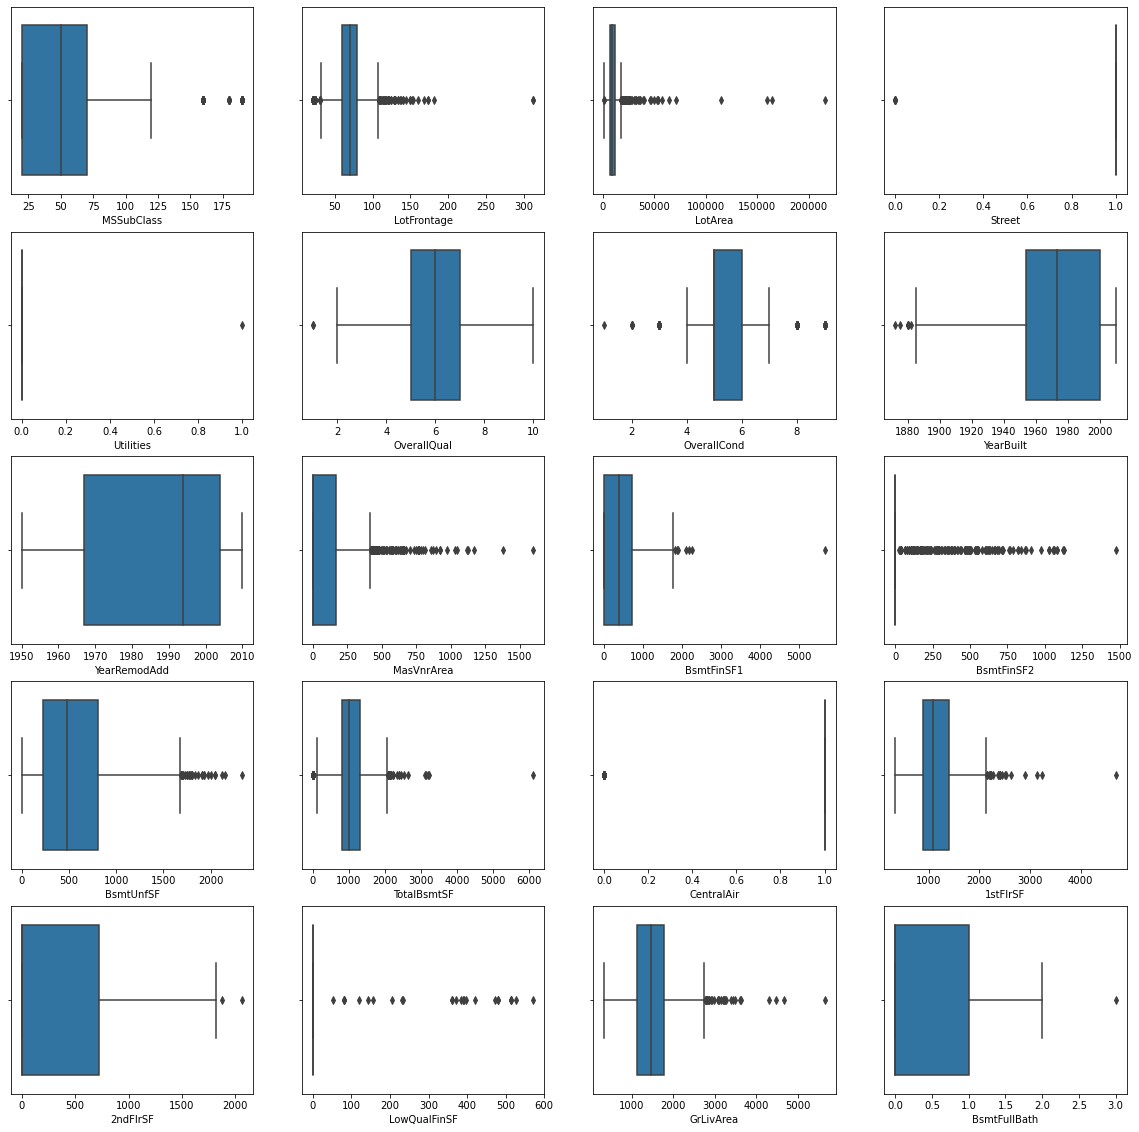

In [12]:
#ploting the distribition plot to check the data distribution 'Street','Utilities','CentralAir'
plt.figure(figsize=(20,20),facecolor='white')
pltnum=1

for column in df.iloc[:,:20]:
    if pltnum <= 20:
        plt.subplot(5,4,pltnum)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=10)
        
    pltnum +=1
plt.show()    


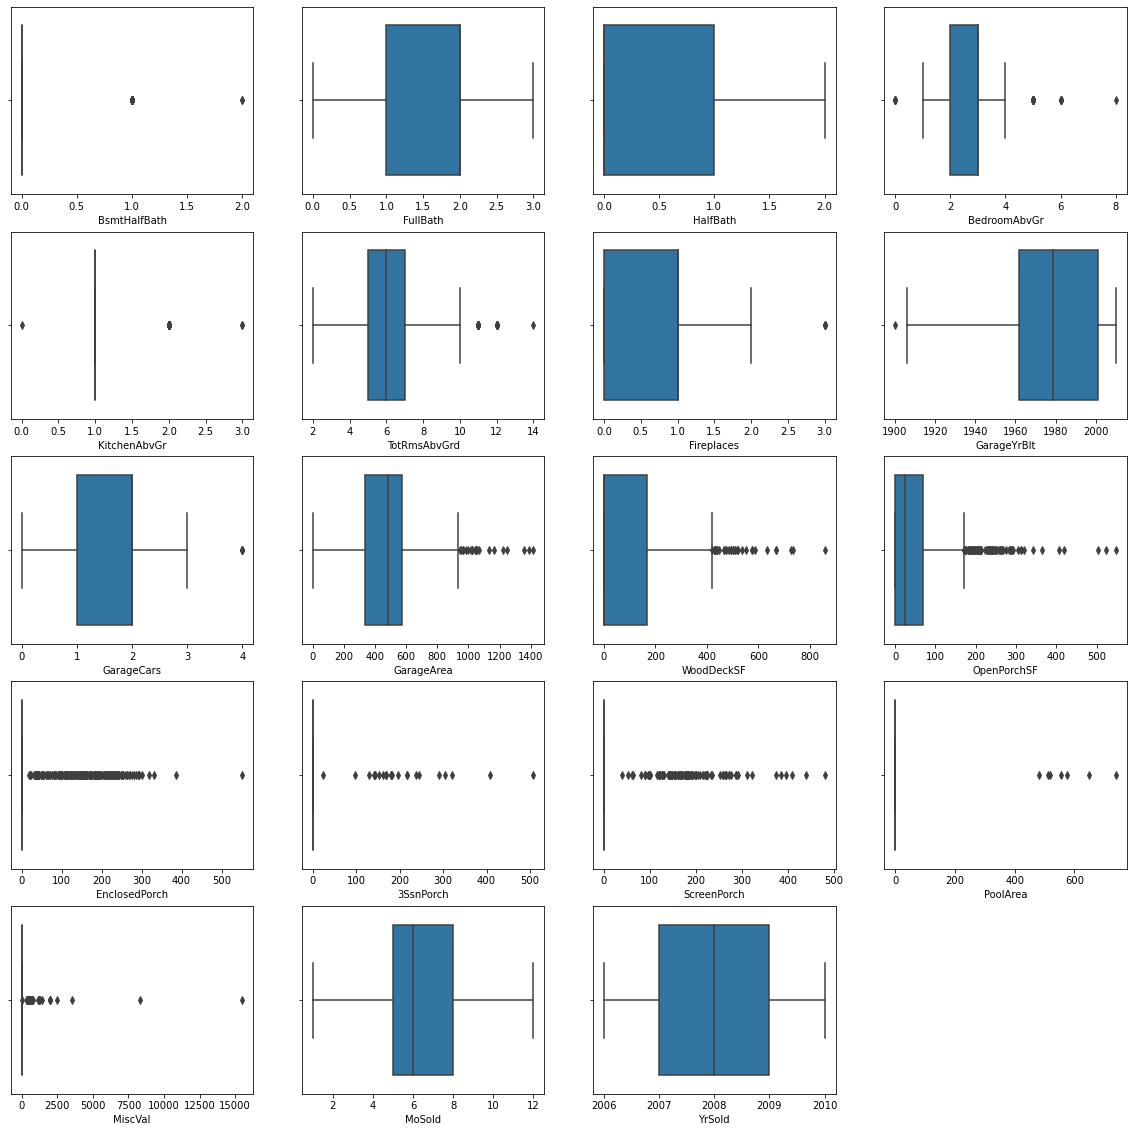

In [14]:
#ploting the distribition plot to check the data distribution
plt.figure(figsize=(20,20),facecolor='white')
pltnum=1

for column in df.iloc[:,20:39]:
    if pltnum <= 20:
        plt.subplot(5,4,pltnum)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=10)
        
    pltnum +=1
plt.show()  

In [ ]:
#as it is clearly visible in many of the featutes having the outliers so using multiple methods to remove the outliers.

In [114]:
df1=df

In [115]:
#quantile q1
q1=df1.iloc[:,[0,1,2,5,6,7,9,10,11,12,13,15,16,17,18,19,20,23,24,25,26,27,28,29,30,31,32,33,34,35,36]].quantile(0.25)

#quantile q3
q3=df1.iloc[:,[0,1,2,5,6,7,9,10,11,12,13,15,16,17,18,19,20,23,24,25,26,27,28,29,30,31,32,33,34,35,36]].quantile(0.75)

#IQR
iqr=q3-q1

In [116]:
for column in df1.iloc[:,[0,1,2,5,6,7,9,10,11,12,13,15,16,17,18,19,20,23,24,25,26,28,29,30,31,32,33,34,35,36]]:
    index=np.where(df1[column] > (q3[column] + (1.5 * iqr[column])))

for column in df1.iloc[:,[5,6,7,13,23,24,27]]:
    index=np.where(df1[column] < (q3[column] - (1.5 * iqr[column])))

In [117]:
#dropping the outlier index
df1=df1.drop(df1.index[index])

In [118]:
#checking the new shape
df1.shape

(1325, 274)

In [119]:
#Data Loss
loss_percentage=(1460-1325)/1460*100
print(loss_percentage)

9.246575342465754


In [120]:
#df.skew(axis = 0, skipna = True)
#checking the skewness and correlation between features and the target Next_Tmax
#skew_df=df1.iloc[:,:40].abs().skew()
#skew_df['SalePrice'].sort_values(ascending=False)

In [121]:
#checking the skewness and correlation between features and the target Next_Tmax
corr_df=df1.iloc[:,:40].abs().corr()
corr_df['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.713126
GrLivArea        0.642116
GarageCars       0.563162
GarageArea       0.557655
TotalBsmtSF      0.533891
1stFlrSF         0.520987
FullBath         0.499451
TotRmsAbvGrd     0.474933
YearBuilt        0.464878
YearRemodAdd     0.459852
GarageYrBlt      0.448604
Fireplaces       0.417083
MasVnrArea       0.414865
BsmtFinSF1       0.316912
OpenPorchSF      0.311465
2ndFlrSF         0.308060
LotFrontage      0.286614
WoodDeckSF       0.279056
HalfBath         0.250171
BsmtUnfSF        0.211937
CentralAir       0.198633
LotArea          0.189789
BsmtFullBath     0.187327
BedroomAbvGr     0.136025
PoolArea         0.103171
ScreenPorch      0.079793
MoSold           0.063592
3SsnPorch        0.052789
Street           0.040731
Utilities       -0.001177
BsmtHalfBath    -0.017308
BsmtFinSF2      -0.019260
MiscVal         -0.021199
LowQualFinSF    -0.035162
YrSold          -0.043779
MSSubClass      -0.058498
OverallCond     -0.070879
EnclosedPorc

In [ ]:
#There is skweness is also present in the multiple features as the range of skewness is -0.5 to +0.5.
#the features are OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF

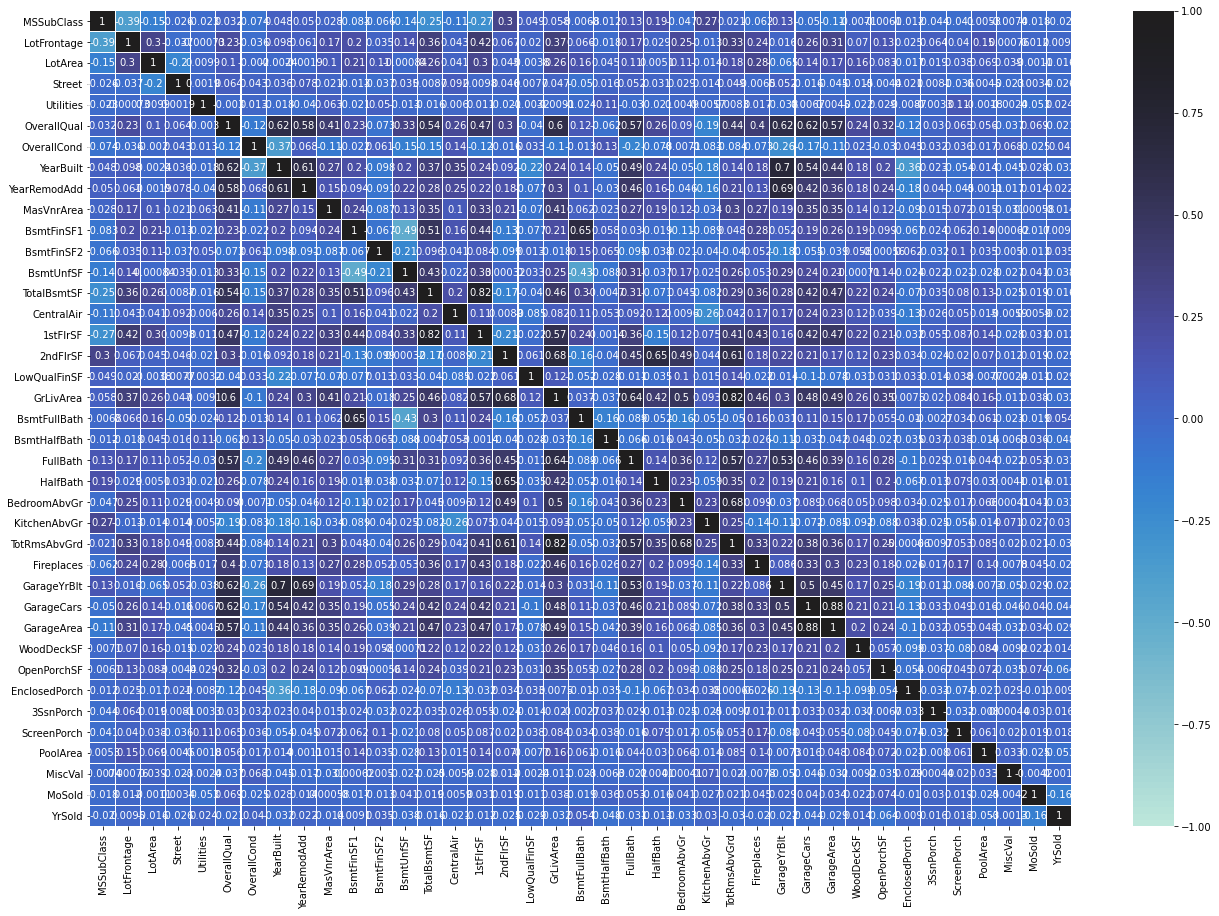

In [149]:
#using the heatmap to check the multicolliniarity between the features.
corr_matrix=df1.iloc[:,:39].abs().corr()

plt.figure(figsize=(22,15))

sns.heatmap(corr_matrix,vmin=-1,vmax=1,center=True,annot=True, fmt='.2g',linewidths=0.1)
plt.show()

In [ ]:
#There is multicolliniarity issues shows in many of the colums so checking the same with the varience inflation factor.

In [122]:
#Using power_transform method to solve the skewness issue
x_tst=['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF']
features=df1[x_tst]

In [123]:
#using power transform to remove the skewness.
from sklearn.preprocessing import power_transform
x_tst=power_transform(features.values,method='yeo-johnson')

In [125]:
#x__tst=pd.DataFrame(data, columns=features.values)
#x__tst.skew()

In [126]:
#df1=pd.DataFrame(data, columns=['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF'])
#df1.skew() `b

In [127]:
df1[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF']]=x_tst
df1.head()

,MSSubClass,LotFrontage,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,120,70.049958,4928,1,0,-0.080245,5,1976,1976,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,95.000000,15865,1,0,1.305057,6,1970,1970,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,92.000000,9920,1,0,0.625253,5,1996,1997,0.0,...,0,0,0,1,0,0,0,0,1,0
3,20,105.000000,11751,1,0,-0.080245,6,1977,1977,480.0,...,0,0,0,0,0,0,0,0,1,0
4,20,70.049958,16635,1,0,-0.080245,7,1977,2000,126.0,...,0,0,0,1,0,0,0,0,1,0


In [128]:
df1['1stFlrSF'].value_counts()

0.0    1325
Name: 1stFlrSF, dtype: int64

In [129]:
#checking the skewness and correlation between features and the target Next_Tmax
corr_df=df1.iloc[:,:40].abs().corr()
corr_df['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
FullBath         0.499451
TotRmsAbvGrd     0.474933
YearBuilt        0.464878
YearRemodAdd     0.459852
GarageYrBlt      0.448604
Fireplaces       0.417083
MasVnrArea       0.414865
BsmtFinSF1       0.316912
OpenPorchSF      0.311465
2ndFlrSF         0.308060
LotFrontage      0.286614
WoodDeckSF       0.279056
HalfBath         0.250171
OverallQual      0.243626
BsmtUnfSF        0.211937
CentralAir       0.198633
LotArea          0.189789
BsmtFullBath     0.187327
TotalBsmtSF      0.174390
BedroomAbvGr     0.136025
PoolArea         0.103171
GarageCars       0.090276
ScreenPorch      0.079793
GarageArea       0.068259
MoSold           0.063592
3SsnPorch        0.052789
Street           0.040731
Utilities       -0.001177
BsmtHalfBath    -0.017308
BsmtFinSF2      -0.019260
MiscVal         -0.021199
LowQualFinSF    -0.035162
YrSold          -0.043779
MSSubClass      -0.058498
OverallCond     -0.070879
EnclosedPorch   -0.086592
KitchenAbvGr    -0.111285
1stFlrSF    

In [130]:
df2=df1.iloc[:,:39]
df2.head()

,MSSubClass,LotFrontage,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,120,70.049958,4928,1,0,-0.080245,5,1976,1976,0.0,...,-0.183179,0,205,0,0,0,0,0,2,2007
1,20,95.000000,15865,1,0,1.305057,6,1970,1970,0.0,...,0.619428,81,207,0,0,224,0,0,10,2007
2,60,92.000000,9920,1,0,0.625253,5,1996,1997,0.0,...,-0.114943,180,130,0,0,0,0,0,6,2007
3,20,105.000000,11751,1,0,-0.080245,6,1977,1977,480.0,...,0.291986,0,122,0,0,0,0,0,1,2010
4,20,70.049958,16635,1,0,-0.080245,7,1977,2000,126.0,...,0.216821,240,0,0,0,0,0,0,6,2009


In [131]:
#Ussing standard Scalar to scale the continious data numenical data
scalar=StandardScaler()
x_data=scalar.fit_transform(df2)

In [132]:
df2.iloc[:,:39]=x_data

In [133]:
df2.head()

,MSSubClass,LotFrontage,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1.467020,-0.026513,-0.551544,0.067446,-0.027482,-0.080245,-0.477539,0.003458,-0.531544,-0.609316,...,-0.183179,-0.789843,2.402187,-0.318305,-0.11966,-0.269421,-0.066738,-0.086239,-1.576580,-0.619103
1,-0.848546,1.095556,0.504704,0.067446,-0.027482,1.305057,0.468259,-0.214721,-0.836742,-0.609316,...,0.619428,-0.153351,2.432838,-0.318305,-0.11966,3.830460,-0.066738,-0.086239,1.354277,-0.619103
2,0.077681,0.960638,-0.069438,0.067446,-0.027482,0.625253,-0.477539,0.730719,0.536650,-0.609316,...,-0.114943,0.624583,1.252744,-0.318305,-0.11966,-0.269421,-0.066738,-0.086239,-0.111151,-0.619103
3,-0.848546,1.545282,0.107392,0.067446,-0.027482,-0.080245,0.468259,0.039821,-0.480677,1.969053,...,0.291986,-0.789843,1.130137,-0.318305,-0.11966,-0.269421,-0.066738,-0.086239,-1.942937,1.634501
4,-0.848546,-0.026513,0.579068,0.067446,-0.027482,-0.080245,1.414057,0.039821,0.689249,0.067506,...,0.216821,1.096059,-0.739622,-0.318305,-0.11966,-0.269421,-0.066738,-0.086239,-0.111151,0.883299


In [134]:
#checking feature colliniarity using VIF
vif=pd.DataFrame()
vif['features']=df2.columns
vif['vif score']=[variance_inflation_factor(x_data,i) for i in range(x_data.shape[1])]
vif

,features,vif score
0,MSSubClass,1.722007
1,LotFrontage,1.610956
2,LotArea,1.313071
3,Street,1.091717
4,Utilities,1.046579
5,OverallQual,3.536229
6,OverallCond,1.741709
7,YearBuilt,4.641987
8,YearRemodAdd,2.782021
9,MasVnrArea,1.414532


In [ ]:
#There is feature colliniarity issue in the multiple features.features having score more than 5 having multicolliniarity issue.
#BsmtFinSF1,BsmtUnfSF,GarageCars
#deleting the columns having the multicolliniarity issue.

In [162]:
#Checking the value count of some variable having NaN values(GrLivArea,1stFlrSF)
df2['1stFlrSF'].value_counts()

0.0    1325
Name: 1stFlrSF, dtype: int64

In [135]:
#dropping the columns having multicollinarity issue
df1=df1.drop(columns=['BsmtFinSF1','BsmtUnfSF','GarageCars','1stFlrSF','GrLivArea'],axis=1)

In [140]:
#Seprating the train dataset:
df_train = df1.loc[df1['Source']=="train"]

#seprating the test dataset:
df_test = df1.loc[df1['Source']=="test"]

In [141]:
print(df_train.shape,df_test.shape)

(1058, 269) (267, 269)


In [142]:
#Dropping the column source form the train dataset:
df_train=df_train.drop(columns='Source',axis=1)
df_train.head()

,MSSubClass,LotFrontage,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,120,70.049958,4928,1,0,-0.080245,5,1976,1976,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,95.000000,15865,1,0,1.305057,6,1970,1970,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,92.000000,9920,1,0,0.625253,5,1996,1997,0.0,...,0,0,0,1,0,0,0,0,1,0
3,20,105.000000,11751,1,0,-0.080245,6,1977,1977,480.0,...,0,0,0,0,0,0,0,0,1,0
4,20,70.049958,16635,1,0,-0.080245,7,1977,2000,126.0,...,0,0,0,1,0,0,0,0,1,0


In [143]:
#Dropping the column Price and sources form the test dataset:
df_test=df_test.drop(columns=['SalePrice','Source'],axis=1)
df_test.reset_index()

,index,MSSubClass,LotFrontage,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1168,20,86.000000,14157,1,0,1.962821,5,2005,2006,...,0,0,0,1,0,0,0,0,1,0
1,1169,120,70.049958,5814,1,0,1.305057,5,1984,1984,...,0,0,0,0,1,0,0,0,0,0
2,1170,20,70.049958,11838,1,0,1.305057,5,2001,2001,...,0,0,0,1,0,0,0,0,1,0
3,1172,60,86.000000,14598,1,0,-0.080245,5,2007,2007,...,0,0,0,1,0,0,0,0,1,0
4,1173,180,21.000000,1936,1,0,-1.589833,6,1970,1970,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,1455,20,78.000000,10206,1,0,1.305057,5,2007,2007,...,0,0,0,1,0,0,0,0,1,0
263,1456,20,57.000000,9245,1,0,-0.816330,5,1994,1995,...,0,0,0,1,0,0,0,0,1,0
264,1457,20,70.049958,11241,1,0,-0.080245,7,1970,1970,...,0,0,0,1,0,0,0,0,1,0
265,1458,50,50.000000,5000,1,0,-0.080245,7,1947,1950,...,0,0,0,1,0,0,0,0,1,0


In [145]:
#Checking the shape 
print(df_test.shape,df_train.shape)

(267, 267) (1058, 268)


In [146]:
#now seprating the x and y from the train dataset to perform model building:
x=df_train.drop(columns='SalePrice',axis=1)
y=df_train['SalePrice']

In [147]:
#Finding best Random State:
maxAcc=0
maxRs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    acc_r2=r2_score(y_test,y_pred)
    if acc_r2 > maxAcc:
        maxAcc=acc_r2
        maxRs=i
        
print(f"Best Accuracy(Next_Tmax) is : {maxAcc* 100:.2f}%")
print("The Best Random State(Next_Tmax) is :",maxRs)     

Best Accuracy(Next_Tmax) is : 88.46%
The Best Random State(Next_Tmax) is : 179


In [148]:
#seprating the train and test datasets with the best find random state
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=179)

In [149]:
#model Evaluation for LR:
print('\n==========Model Evaluaton and Accuracy check using LinearRegression===========')
lr=LinearRegression()
lr.fit(x_train,y_train)
y_predlr=lr.predict(x_test)
print(f"The accuracy of the model using LinearRegression is: {r2_score(y_test,y_predlr)*100:.2f}%\n")



#model Evaluation for KNN:
print('\n==========Model Evaluaton and Accuracy check using KNeighborsRegressor===========')
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
y_predknn=knn.predict(x_test)
print(f"The accuracy of the model for using KNeighborsRegressor is: {r2_score(y_test,y_predknn)*100:.2f}%\n")



#model Evaluation for RandomForestRegressor:
print('\n==========Model Evaluaton and Accuracy check using RandomForestRegressor===========')
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_predrfr=rfr.predict(x_test)
print(f"The accuracy of the model using RandomForestRegressor is: {r2_score(y_test,y_predrfr)*100:.2f}%\n")



#model Evaluation for AdaBoostRegressor:
print('\n==========Model Evaluaton and Accuracy check using AdaBoostRegressor===========')
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)
y_predada=ada.predict(x_test)
print(f"The accuracy of the model for using AdaBoostRegressor is: {r2_score(y_test,y_predada)*100:.2f}%\n")



#model Evaluation for SVR:
print('\n===============Model Evaluaton and Accuracy check using SVR====================')
svr=SVR()
svr.fit(x_train,y_train)
y_predsvr=svr.predict(x_test)
print(f"The accuracy of the model for using SVR is: {r2_score(y_test,y_predsvr)*100:.2f}%\n")


==========Model Evaluaton and Accuracy check using LinearRegression===========
The accuracy of the model using LinearRegression is: 88.46%


==========Model Evaluaton and Accuracy check using KNeighborsRegressor===========
The accuracy of the model for using KNeighborsRegressor is: 32.51%


==========Model Evaluaton and Accuracy check using RandomForestRegressor===========
The accuracy of the model using RandomForestRegressor is: 86.73%


==========Model Evaluaton and Accuracy check using AdaBoostRegressor===========
The accuracy of the model for using AdaBoostRegressor is: 82.41%


===============Model Evaluaton and Accuracy check using SVR====================
The accuracy of the model for using SVR is: -9.37%



In [150]:
print('\n=============Cross Validation Score of Linear Reggression==============')
cvs_lr=cross_val_score(lr,x,y,cv=5)
print(f"Cross validation for the Linear Reggression is: {cvs_lr.mean()*100:.2f}%\n")

print('\n=============Cross Validation Score of KNeighborsRegressor==============')
cvs_knn=cross_val_score(knn,x,y,cv=5)
print(f"Cross validation for the KNeighborsRegressor is: {cvs_knn.mean()*100:.2f}%\n")

print('\n==========Cross Validation Score of Random Forest Regressor===========')
cvs_rfr=cross_val_score(rfr,x,y,cv=5)
print(f"Cross validation for the Random Forest Regressor is: {cvs_rfr.mean()*100:.2f}%\n")

print('\n============Cross Validation Score of AdaBoostRegressor===================')
cvs_ada=cross_val_score(ada,x,y,cv=5)
print(f"Cross validation for the AdaBoostRegressor is: {cvs_ada.mean()*100:.2f}%\n")

print('\n===================Cross Validation Score of SVR========================')
cvs_svr=cross_val_score(svr,x,y,cv=5)
print(f"Cross validation for the SVR Classifier is: {cvs_svr.mean()*100:.2f}%\n")


=============Cross Validation Score of Linear Reggression==============
Cross validation for the Linear Reggression is: 76.05%


=============Cross Validation Score of KNeighborsRegressor==============
Cross validation for the KNeighborsRegressor is: 32.86%


==========Cross Validation Score of Random Forest Regressor===========
Cross validation for the Random Forest Regressor is: 82.96%


============Cross Validation Score of AdaBoostRegressor===================
Cross validation for the AdaBoostRegressor is: 76.36%


===================Cross Validation Score of SVR========================
Cross validation for the SVR Classifier is: -5.78%



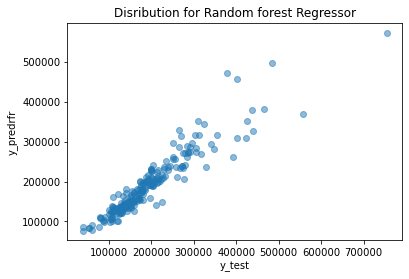

In [151]:
#checking distribution for the Random forest Regressor
plt.scatter(y_test, y_predrfr, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_predrfr")
plt.title("Disribution for Random forest Regressor")
plt.show()

In [ ]:
#Data Distribution looks liniar for between y_test vs y_pred for random forest classifier

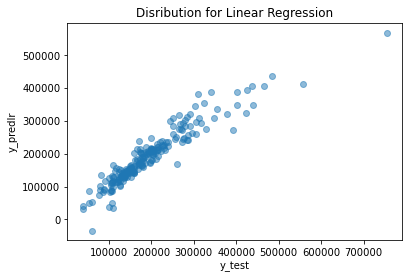

In [152]:
#checking distribution for the Liniar reggression
plt.scatter(y_test, y_predlr, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_predlr")
plt.title("Disribution for Linear Regression")
plt.show()

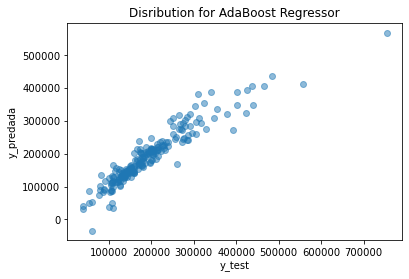

In [153]:
#checking distribution for the AdaBoost Regressor
plt.scatter(y_test, y_predlr, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_predada")
plt.title("Disribution for AdaBoost Regressor")
plt.show()

In [ ]:
#As we can see that the result of r2 accuracy and cross validation score of all the models.
#LinearReggression:88.46%
#Cross Validation Score:76.05%
#Diffrence:12.41%

#KNeighborsRegressor:32.51%
#Cross Validation Score:32.86%
#Diffrence: -0.35%

#Random Forest Regressor:86.73%
#Cross Validation Score:82.96%
#Diffrence: 3.77%

#AdaBoostRegressor:82.41% 
#Cross Validation Score:76.36%
#Diffrence: 6.05%

#SVR:-9.37%
#Cross Validation Score:-5.78%
#Diffrence: -15.15%

In [ ]:
#Selecting the Random Forest Regressor as the best model as it has the least diffrence between r2_score and cross validation score and accuracy 86.73%
#Performing hyper parameter tuning on Random Forest Regressor.

In [154]:
#Now Appling the gridsearchcv beofore building the model to check the best parameter.
best_param={'n_estimators':[80,90,100],
           'max_depth':[10,12,15],
           'min_samples_split':[2,3,5],
           'min_samples_leaf':[2,4,6]}

In [155]:
gridcv=GridSearchCV(rfr,param_grid=best_param)

In [156]:
gridcv.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 12, 15],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [80, 90, 100]})

In [157]:
gridcv.best_params_

{'max_depth': 12,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 80}

In [170]:
#model Evaluation for RandomForestRegressor:
rfr=RandomForestRegressor(max_depth=12,min_samples_leaf=3,min_samples_split=2,n_estimators=80)
rfr.fit(x_train,y_train)

y_predrfr=rfr.predict(x_test)

#accuracy_scorelr=r2_score(y_test,y_predlr)
print(f"The accuracy of the model using RandomForestRegressor is: {r2_score(y_test,y_predrfr)*100:.2f}%\n")

The accuracy of the model using RandomForestRegressor is: 85.38%



In [ ]:
#After the hyper parameter tuning on RandomForestRegressor the r2_score is not increesed.

In [171]:
#model Evaluation for RandomForestRegressor:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

y_predrfr=rfr.predict(x_test)

#accuracy_scorelr=r2_score(y_test,y_predlr)
print(f"The accuracy of the model using RandomForestRegressor is: {r2_score(y_test,y_predrfr)*100:.2f}%\n")

The accuracy of the model using RandomForestRegressor is: 86.22%



In [172]:
#Saving the model
import pickle
filename = 'Housing_price_pridiction_model.pkl'
pickle.dump(rfr, open(filename, 'wb'))

In [ ]:
#loading the model and checking on test data set.

In [173]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [174]:
df_test.head()

,MSSubClass,LotFrontage,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1168,20,86.000000,14157,1,0,1.962821,5,2005,2006,200.0,...,0,0,0,1,0,0,0,0,1,0
1169,120,70.049958,5814,1,0,1.305057,5,1984,1984,0.0,...,0,0,0,0,1,0,0,0,0,0
1170,20,70.049958,11838,1,0,1.305057,5,2001,2001,0.0,...,0,0,0,1,0,0,0,0,1,0
1172,60,86.000000,14598,1,0,-0.080245,5,2007,2007,74.0,...,0,0,0,1,0,0,0,0,1,0
1173,180,21.000000,1936,1,0,-1.589833,6,1970,1970,0.0,...,0,0,0,1,0,0,0,0,1,0


In [175]:
y_predmdl = loaded_model.predict(df_test)

In [176]:
y_predmdl

array([334436.46, 237868.94, 259554.84, 217269.05,  81702.11, 136796.83,
       295659.14, 227148.54, 161217.6 , 144938.87, 136294.5 , 175004.01,
       306371.68, 110743.75, 118413.  , 129636.93, 167508.5 , 191256.  ,
       145905.33, 151115.95,  99344.17, 121056.66, 176986.76, 147234.  ,
       184911.1 , 149555.68, 199673.45, 225351.85, 160278.29, 176285.01,
       184346.  , 122680.9 , 157438.5 , 149951.  , 105086.81, 299066.96,
       198340.54, 187153.5 , 137123.53, 125492.  , 132421.  , 113529.5 ,
       209651.77, 328394.19, 141093.87, 187299.9 ,  84633.39, 275629.73,
       108245.72, 178861.04, 114096.62, 249304.3 ,  88245.22, 161737.53,
       125137.41, 146705.5 , 198485.84,  87226.52, 152931.14, 201776.38,
       139526.84, 158824.5 , 259715.64, 165865.  , 139714.89, 139493.33,
       238226.79, 285835.47, 197736.3 , 268362.02, 143293.05, 220828.76,
       139467.17, 136927.59, 154158.05, 178588.12, 240138.36, 330456.3 ,
       150783.  , 175920.25, 236414.45, 149254.44, 

In [ ]:
#this will complete the project.